# Employee Attrition _ Prediction Model & Streamlit App Preperation

#### Part I: Importing the libraries & pulling in the dataset:

In [984]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [985]:
df = pd.read_csv("data/employee_attrition_and_engagement.csv")

#### Part II: Cleaning the dataset:

In [986]:
pd.set_option('display.max_columns', None)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [987]:
df.shape

(1470, 35)

###### ** This dataset has 1470 rows and 35 columns. 

In [988]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [989]:
# Value counts on the target lets me know that 237 people in this dataset have left the company, while 1233 are still employeed there.

In [990]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [991]:
df['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [992]:
# The dtypes show me that the target (attrition) is listed as an object so we either need to map it to 1s and 2s for the matrix or list it as a boolean. 
# Business travel we may want to change to numerical for the model (1 through 3 rather than the three options).
# Education is listed as a number but we may want that listed as an object for the EDA and then change back to an int for the model.
# Gender is currently an object, may want to change to numerical (female 1, male 2) for the model.
# Job Level is listed as an int, may want to change that to txt for the EDA then back to numerical for the model.
# Marital status is an object, may want to make that numerical for the model.
# Over18 is listed as an object, may want to make the Y and N 0 or 1 for the model.
# Overtime is listed as object but may want to make the yes and no 0 and 1 for the model.


# Converting the ones to txt that I need to for the EDA now (below)
# Will convert them back later when I get to the model and handle converting the txt to numerical that I need to at that time as well.

In [993]:
df['Education'] = df['Education'].map({1:'High School', 2:'Associates', 3:'Bachelors', 4:'Masters', 5:'Docturate'})

In [994]:
df['Education'].value_counts()

Education
Bachelors      572
Masters        398
Associates     282
High School    170
Docturate       48
Name: count, dtype: int64

In [995]:
df['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [996]:
df['JobLevel'] = df['JobLevel'].map({1:'Entry Level', 2:'Mid Level', 3:'Experienced', 4:'Professional', 5:'Expert'})

In [997]:
df['JobLevel'].value_counts()

JobLevel
Entry Level     543
Mid Level       534
Experienced     218
Professional    106
Expert           69
Name: count, dtype: int64

In [998]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [999]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [1000]:
df.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'gender', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobrole', 'jobsatisfaction',
       'maritalstatus', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'over18', 'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [1001]:
# Made all column names lowercase and snakecase to make it easier when typing in for the model.

In [1002]:
# There are no unnamed columns or extra index columns to drop.

In [1003]:
df.isnull().sum()

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [1004]:
# There are no null values to have to take care of.
df.dtypes

age                          int64
attrition                   object
businesstravel              object
dailyrate                    int64
department                  object
distancefromhome             int64
education                   object
educationfield              object
employeecount                int64
employeenumber               int64
environmentsatisfaction      int64
gender                      object
hourlyrate                   int64
jobinvolvement               int64
joblevel                    object
jobrole                     object
jobsatisfaction              int64
maritalstatus               object
monthlyincome                int64
monthlyrate                  int64
numcompaniesworked           int64
over18                      object
overtime                    object
percentsalaryhike            int64
performancerating            int64
relationshipsatisfaction     int64
standardhours                int64
stockoptionlevel             int64
totalworkingyears   

#### Part III: Exploratory analysis of the dataset:

In [1005]:
# Barplots

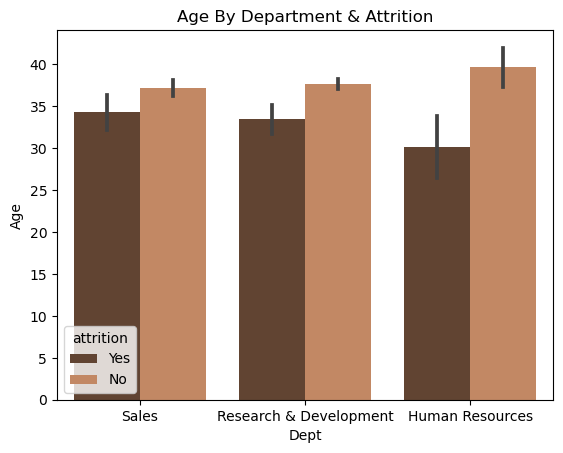

In [1006]:
sns.barplot(data = df,
                x = 'department',
                y = 'age',
                palette= 'copper',
                hue = 'attrition');

plt.title('Age By Department & Attrition')
plt.xlabel('Dept')
plt.ylabel('Age')

plt.savefig('images/barplotagebydeptandattrition.png')

###### ** Average Age Across Departments: Average Age Range: The average age across all departments falls within the range of 30 to 40. Retention Patterns with Age: Generally, individuals who are slightly older, particularly around the 40-mark, tend to have longer tenures within the company. Notably, this trend is more pronounced in the HR department, where employees with slightly older ages exhibit a higher tendency to stay.

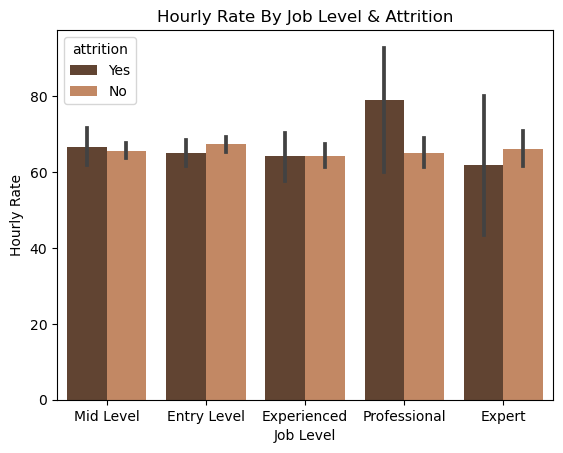

In [1007]:
sns.barplot(data = df,
                x = 'joblevel',
                y = 'hourlyrate',
                palette= 'copper',
                hue = 'attrition');

plt.title('Hourly Rate By Job Level & Attrition')
plt.xlabel('Job Level')
plt.ylabel('Hourly Rate')

plt.savefig('images/barplothourlyratebyjoblevelandattrition.png')

###### ** The average hourly rate falls within the range of 60 to 80 across all employment levels. Entry and Expert level employees are more inclined to stay, especially since they are paid more. Conversely, higher pay at the Mid and Professional levels corresponds to a higher likelihood of attrition, particularly at the Professional (Level 4) tier. Notably, employees at the Professional level (Level 4) exhibit a higher tendency to leave. Employees at the Expert level tend to stay more, reflecting a higher retention rate. Overall Analysis: The analysis suggests a correlation between compensation levels and retention rates. While higher pay at entry and expert levels corresponds to higher retention, mid and professional levels show a tendency for higher attrition.

In [1008]:
# Box Plots

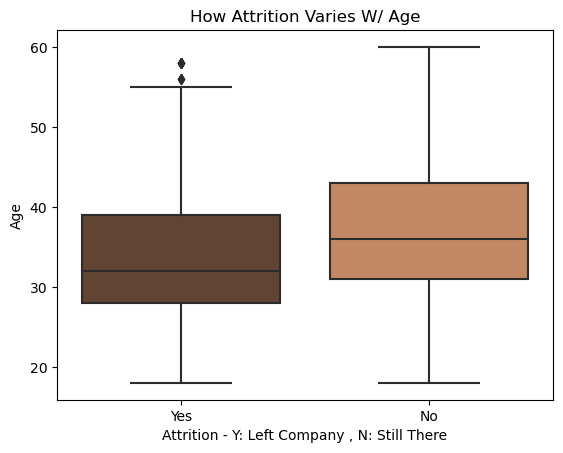

In [1009]:
sns.boxplot(data=df,
            x='attrition',
            y='age',
           palette = 'copper');

plt.title('How Attrition Varies W/ Age')
plt.xlabel('Attrition - Y: Left Company , N: Still There')
plt.ylabel('Age')

plt.savefig('images/boxplothowattritionvarieswithage.png')

###### ** Attrition Age Range (50%): Half of the employees who left the company were aged between 28 and 39. Retention Age Range (50%): Conversely, 50% of the employees who chose to stay had ages falling within the range of 31 to 43. The median age for those who left the company is approximately 32. In contrast, the median age for those who stayed is around 36. General Trend: A discernible trend indicates that, in general, younger employees are more likely to experience attrition. Outliers: Despite the overall trend, there are a few outliers representing individuals who left the company at older ages.

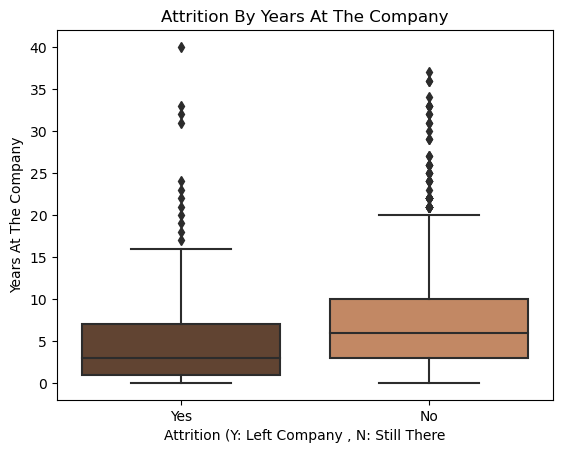

In [1010]:
sns.boxplot(data=df,
            x='attrition',
            y='yearsatcompany',
           palette = 'copper');

plt.title('Attrition By Years At The Company')
plt.xlabel('Attrition (Y: Left Company , N: Still There')
plt.ylabel('Years At The Company')

plt.savefig('images/boxplotattritionbyyearsatcompany.png')

###### ** The predominant group leaving the company has a tenure ranging from 1 to 7 years. Conversely, the majority of employees choosing to stay with the company have a tenure between 3 and 10 years. Half of those departing had a tenure between 1 and 7 years. The median tenure for those who left is approximately 3 years, while for those staying, it is around 6 years. General Trend: There is a notable trend suggesting that the longer employees have been with the company, the more likely they are to stay. Outliers: Despite the overall trend, there are a few outliers representing individuals who deviate from the typical tenure pattern.

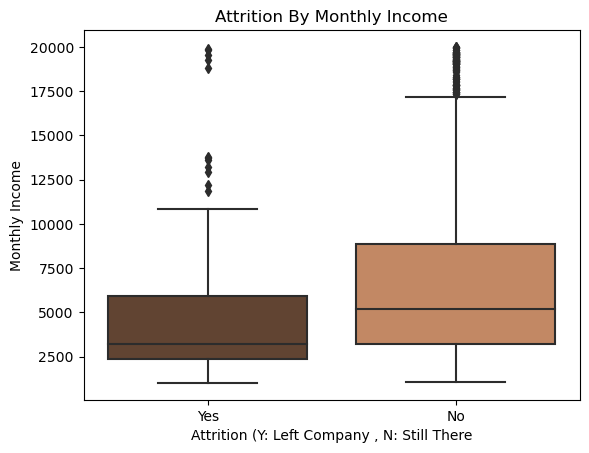

In [1011]:
sns.boxplot(data=df,
            x='attrition',
            y='monthlyincome',
           palette = 'copper');

plt.title('Attrition By Monthly Income')
plt.xlabel('Attrition (Y: Left Company , N: Still There')
plt.ylabel('Monthly Income')

plt.savefig('images/boxplotattritionbymonthlyincome.png')

###### ** The predominant group leaving the company falls within the monthly income range of 1000 - 12000. Conversely, the majority of employees choosing to stay have a monthly income between 1000 - 17000. Leaving (50%): Half of those departing had a monthly income ranging from 2500 - 6000. Staying (50%): In contrast, 50% of employees opting to stay had a monthly income within the range of 3000 - 8500. General Trend: A discernible trend indicates that employees with higher monthly incomes are more likely to remain with the company. Outliers: While the overall pattern supports this trend, there are a few outliers that deviate from the norm.

In [1012]:
# 100% Stacked Bar Chart plots

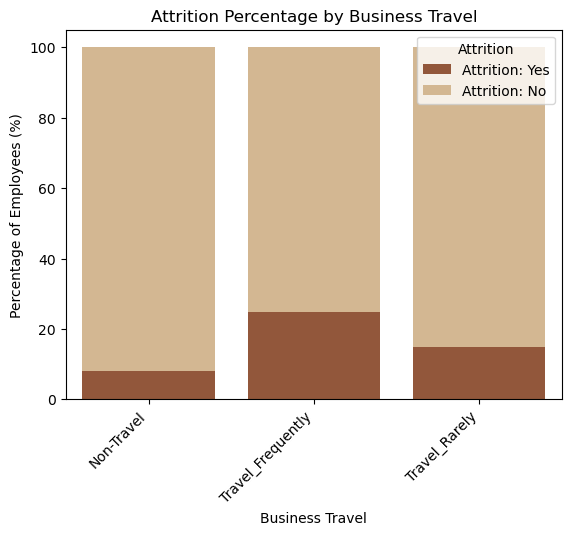

In [1013]:
df_percent = df.groupby('businesstravel')['attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Filter data for attrition categories
attrition_yes = df_percent[df_percent['attrition'] == 'Yes']
attrition_no = df_percent[df_percent['attrition'] == 'No']

# Plot the bars for 'Yes' first
sns.barplot(x="businesstravel", y="percent", data=attrition_yes, color="sienna", label="Attrition: Yes")

# Plot the bars for 'No' on top of the previous ones
sns.barplot(x="businesstravel", y="percent", data=attrition_no, color="burlywood", label="Attrition: No", bottom=attrition_yes['percent'])

plt.title('Attrition Percentage by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Percentage of Employees (%)')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition', loc='upper right');

plt.savefig('images/stackedbarbybustravel.png')

###### We can see that rare travelers have a retention rate of approximately 90%, with less than 10% attrition. Among frequent travelers, the retention rate is also around 80%, but with a higher attrition rate of about 25%. Meanwhile, non-travelers exhibit an exceptionally high retention rate of approximately 95%, with a low attrition rate of about 5%. These observations highlight the varying attrition rates among different travel categories, with non-traveling employees demonstrating the strongest job stability, followed by rare travelers and then frequent travelers.

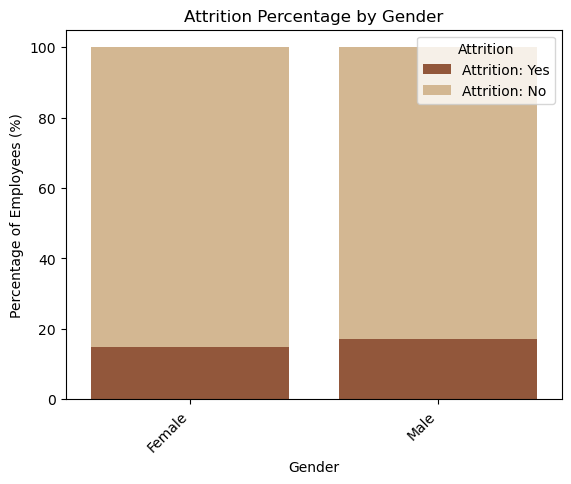

In [1014]:
df_percent = df.groupby('gender')['attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Filter data for attrition categories
attrition_yes = df_percent[df_percent['attrition'] == 'Yes']
attrition_no = df_percent[df_percent['attrition'] == 'No']

# Plot the bars for 'Yes' first
sns.barplot(x="gender", y="percent", data=attrition_yes, color="sienna", label="Attrition: Yes")

# Plot the bars for 'No' on top of the previous ones
sns.barplot(x="gender", y="percent", data=attrition_no, color="burlywood", label="Attrition: No", bottom=attrition_yes['percent'])

plt.title('Attrition Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage of Employees (%)')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition', loc='upper right');

plt.savefig('images/stackedbarbygender.png')

###### ** Gender-Based Retention Rates: Approximately 86% of female employees choose to stay, indicating a retention rate of 86%. Similarly, around 80% of male employees opt to stay, resulting in an 80% retention rate. General Observation: In general, the analysis suggests that gender does not play a substantial role in influencing the overall attrition rate.

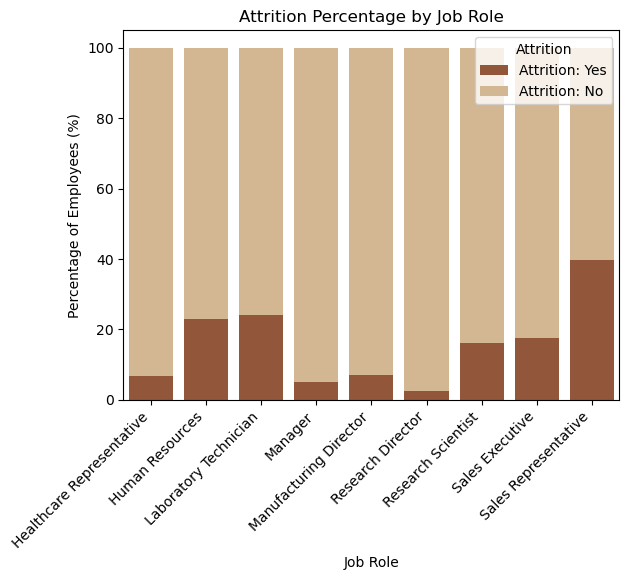

In [1015]:
df_percent = df.groupby('jobrole')['attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Filter data for attrition categories
attrition_yes = df_percent[df_percent['attrition'] == 'Yes']
attrition_no = df_percent[df_percent['attrition'] == 'No']

# Plot the bars for 'Yes' first
sns.barplot(x="jobrole", y="percent", data=attrition_yes, color="sienna", label="Attrition: Yes")

# Plot the bars for 'No' on top of the previous ones
sns.barplot(x="jobrole", y="percent", data=attrition_no, color="burlywood", label="Attrition: No", bottom=attrition_yes['percent'])

plt.title('Attrition Percentage by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Percentage of Employees (%)')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition', loc='upper right');

plt.savefig('images/stackedbarbyjobrole.png')

###### ** Sales Reps have the highest attrition rate among all job roles, with approximately 40% leaving their positions. This suggests that there may be specific challenges or factors within the sales department that are contributing to higher turnover. Research Directors have a unique attrition rate of 2%, indicating an extremely stable workforce in this role. This could be attributed to factors such as job satisfaction, career growth opportunities, or a strong company culture that promotes employee retention. When comparing attrition rates across different job roles, we can observe that the overall attrition rate for sales-related positions (sales executives, sales reps) is relatively higher compared to other roles. This highlights the inherent challenges and turnover patterns commonly associated with sales positions, which may require focused attention from management to improve retention. The attrition rate for HR Professionals is notable, with approximately 20% leaving their positions. This raises questions about potential areas for improvement in talent management and employee satisfaction within HR departments. On the other hand, Managers have the lowest attrition rate, with only about 5% leaving their positions. This indicates the importance of effective leadership and management in promoting employee loyalty and job stability. In terms of specific job roles, lab techs and manufacturing directors have attrition rates that are slightly higher compared to research scientists and healthcare reps. This suggests potential challenges or issues within these specific roles that may need to be addressed to improve retention. In conclusion, our analysis reveals the high attrition rate among sales reps and the exceptional stability of research directors. It also highlights the varying attrition rates across job roles, emphasizing the importance of addressing specific challenges and implementing retention strategies tailored to each role.

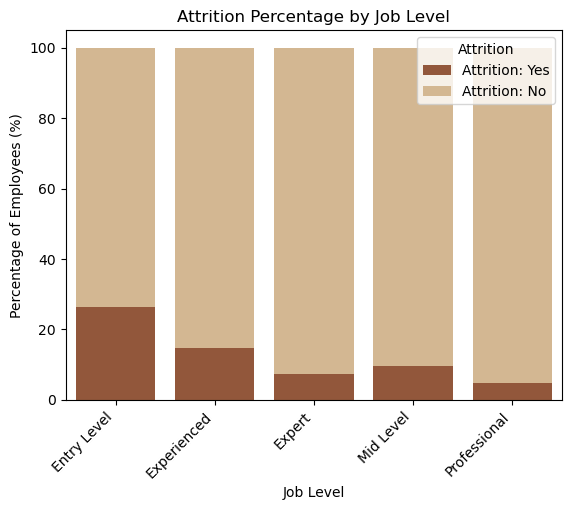

In [1016]:
df_percent = df.groupby('joblevel')['attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Filter data for attrition categories
attrition_yes = df_percent[df_percent['attrition'] == 'Yes']
attrition_no = df_percent[df_percent['attrition'] == 'No']

# Plot the bars for 'Yes' first
sns.barplot(x="joblevel", y="percent", data=attrition_yes, color="sienna", label="Attrition: Yes")

# Plot the bars for 'No' on top of the previous ones
sns.barplot(x="joblevel", y="percent", data=attrition_no, color="burlywood", label="Attrition: No", bottom=attrition_yes['percent'])

plt.title('Attrition Percentage by Job Level')
plt.xlabel('Job Level')
plt.ylabel('Percentage of Employees (%)')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition', loc='upper right');

plt.savefig('images/stackedbarbyjoblevelpng')

###### ** The mid-level employee group exhibits a relatively high attrition rate, with approximately 10% leaving their positions. Entry-level employees also demonstrate a relatively higher attrition rate, with approximately 25% leaving their positions. This raises questions about potential issues related to job satisfaction, career growth opportunities, or onboarding processes for new hires. Among the different employee levels, professionals have a relatively low attrition rate, suggesting a strong commitment and longevity in their positions. This highlights the value and investment in retaining professionals within the organization. Experts, who represent the highest level of expertise within the organization, have an exceptionally low attrition rate. This underscores their significance and the challenges in finding suitable replacements for individuals with such specialized skills. Overall, the attrition rates decrease as employees progress from entry-level to experienced and professional levels, emphasizing the correlation between tenure and job stability. It is notable that the number of employees who choose to stay in each category outweighs those who leave, indicating a general trend of employee retention across all levels.

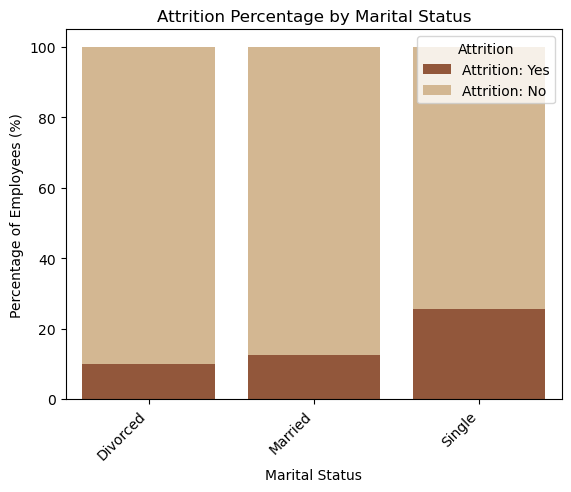

In [1017]:
df_percent = df.groupby('maritalstatus')['attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Filter data for attrition categories
attrition_yes = df_percent[df_percent['attrition'] == 'Yes']
attrition_no = df_percent[df_percent['attrition'] == 'No']

# Plot the bars for 'Yes' first
sns.barplot(x="maritalstatus", y="percent", data=attrition_yes, color="sienna", label="Attrition: Yes")

# Plot the bars for 'No' on top of the previous ones
sns.barplot(x="maritalstatus", y="percent", data=attrition_no, color="burlywood", label="Attrition: No", bottom=attrition_yes['percent'])

plt.title('Attrition Percentage by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Employees (%)')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition', loc='upper right');

plt.savefig('images/stackedbarbymaritalstatuspng')

###### ** Single individuals have a higher attrition rate compared to married and divorced individuals, with approximately 30% leaving their positions. This suggests that factors specific to single employees may contribute to a higher turnover rate. Potential reasons could include a greater sense of career mobility or a desire for change. Married individuals exhibit a lower attrition rate compared to singles and divorced individuals, with only approximately 15% leaving their positions. This indicates that being married may provide stability or job satisfaction that contributes to lower turnover. It is possible that the support and stability provided by a marital relationship positively impact job commitment. Divorced individuals have a moderate attrition rate, with approximately 10% leaving their positions. While still lower than the attrition rate for singles, this suggests potential challenges or factors specific to divorced individuals that contribute to turnover. These factors could include personal life adjustments following a divorce or the need for increased flexibility in work-life balance. It is important to note that the number of employees who choose to stay in each marital status category outweighs those who leave, indicating a general trend of employee retention across all categories. This highlights the overall commitment and job satisfaction within the workforce, regardless of marital status.

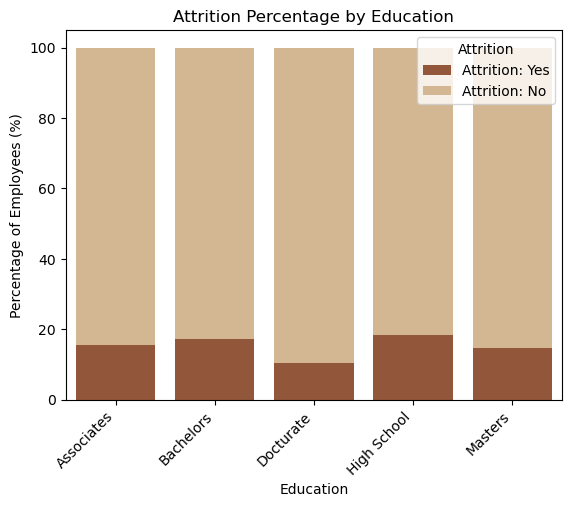

In [1018]:
df_percent = df.groupby('education')['attrition'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

# Filter data for attrition categories
attrition_yes = df_percent[df_percent['attrition'] == 'Yes']
attrition_no = df_percent[df_percent['attrition'] == 'No']

# Plot the bars for 'Yes' first
sns.barplot(x="education", y="percent", data=attrition_yes, color="sienna", label="Attrition: Yes")

# Plot the bars for 'No' on top of the previous ones
sns.barplot(x="education", y="percent", data=attrition_no, color="burlywood", label="Attrition: No", bottom=attrition_yes['percent'])

plt.title('Attrition Percentage by Education')
plt.xlabel('Education')
plt.ylabel('Percentage of Employees (%)')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition', loc='upper right');

plt.savefig('images/stackedbarbyeducationpng')

###### ** Employees with an associate's degree have a slightly lower attrition rate, with approximately 20% leaving their positions. Bachelor's degree holders also exhibit a 20% attrition rate, aligning with the rate observed among employees with high school diplomas. This indicates that obtaining a bachelor's degree does not necessarily guarantee lower turnover rates. Employees with a master's degree have a slightly lower attrition rate, with a little under 20% leaving their positions. On the other hand, employees with a doctoral degree display a lower attrition rate, with approximately 15% leaving their positions. This highlights the value of advanced education and expertise gained through doctoral studies. Overall, while the attrition rates vary among different educational levels, it is essential to note that the majority of employees across all categories choose to stay with the company. This emphasizes the overall commitment and job satisfaction within our workforce.

In [1019]:
# Scatter Plots

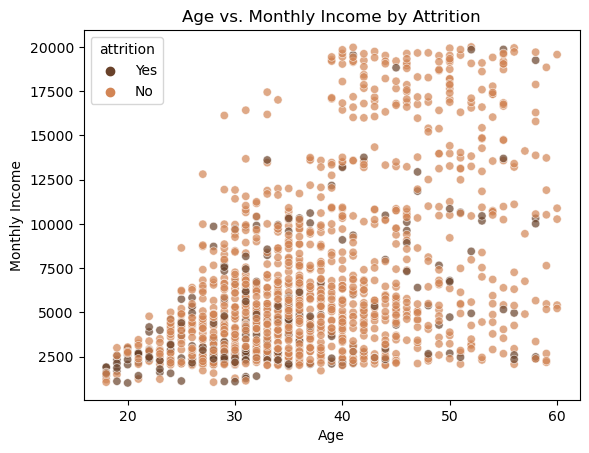

<Figure size 640x480 with 0 Axes>

In [1020]:
sns.scatterplot(data=df,
                x='age',
                y='monthlyincome',
                hue='attrition',
                palette='copper',
                alpha=0.7)

plt.title('Age vs. Monthly Income by Attrition')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

plt.savefig('images/scattterplotagevsmonthlyincomebyattrition.png')

###### ** There is a concentration of brown dots (indicating attrition) in the lower half of both age and income. This suggests that employees with lower incomes and younger ages are more likely to experience attrition. The majority of dots, regardless of attrition status, appear in the lower half of both age and income. This indicates that there are generally more employees with lower incomes and younger ages in the dataset. The density of dots in the lower half of age and income highlights a potential correlation between these two variables and attrition. It suggests that younger employees with lower incomes may be more prone to leaving their positions.

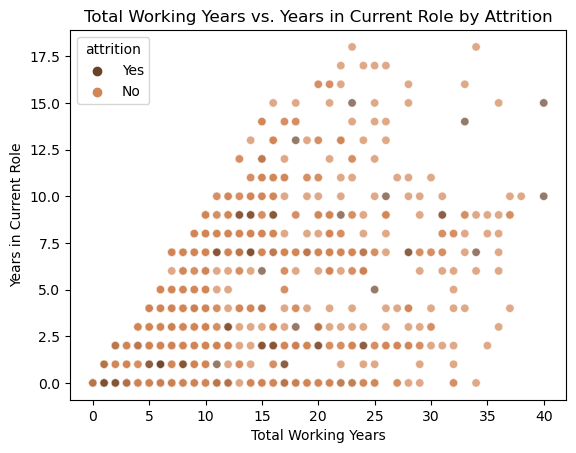

<Figure size 640x480 with 0 Axes>

In [1021]:
sns.scatterplot(data = df,
                x='totalworkingyears',
                y='yearsincurrentrole',
                hue='attrition',
                palette='copper',
                alpha=0.7)

plt.title('Total Working Years vs. Years in Current Role by Attrition')
plt.xlabel('Total Working Years')
plt.ylabel('Years in Current Role')
plt.show()

plt.savefig('images/scattterplottotalworkingyrsvsyrsincurrentrolebyattrition.png')

###### ** While not very significant, there is a higher concentration of brown dots (indicating attrition) in the lower half of both years in the current role and total working years. This suggests that employees with fewer years in their current role and fewer total working years are more likely to experience attrition. The relationship between attrition and the lower half of years in the current role and total working years suggests that employees who are relatively new to their role or have less overall work experience may be more prone to leaving their positions.

In [1022]:
# Violin Plot

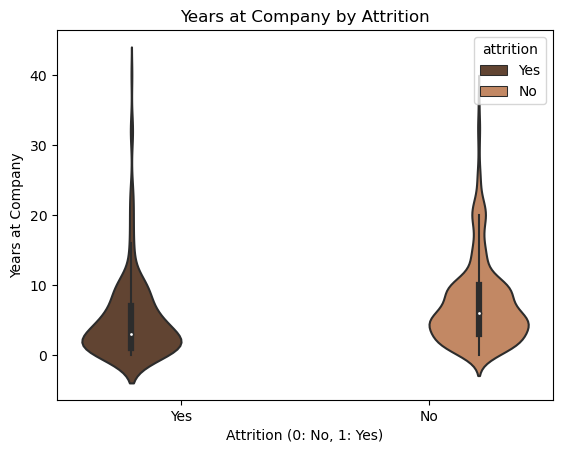

In [1023]:
sns.violinplot(data=df,
               x='attrition',
               y='yearsatcompany',
               hue='attrition',
               palette='copper');

plt.title('Years at Company by Attrition')
plt.xlabel('Attrition (0: No, 1: Yes)')
plt.ylabel('Years at Company')

plt.savefig('images/violinplotyearsatcompanybyattrition.png')

###### ** The distribution of years at the company for both those who stay and those who leave is highly concentrated around the median. For employees who stay, the median years at the company is around 7 years, while for employees who leave, the median is around 3 years. This indicates that attrition tends to occur more frequently among employees with relatively shorter tenures at the company. The top point of the violin plot, representing the maximum years at the company for those who stay, is at 40 years, while it is at 45 years for those who leave. This suggests that there are individuals who have stayed with the company for a significantly longer duration, even though attrition still occurs among them. The lower small point of the violin plot, representing the minimum years at the company, is at 0.6 years for those who stay, indicating a relatively low number of employees who have very short tenures. For those who leave, the minimum years at the company is at 0.4 years, suggesting a similar pattern, but with slightly shorter tenures. The bulky mid-bubble part of the violin plot, representing the majority of the data, for those who stay ends at about 15 years at the company. This indicates that there is a sizable portion of employees who stay with the company for an extended period. In comparison, the violin plot for those who leave is thinner and ends at approximately 15 years, implying a higher attrition rate among employees with longer tenures. The difference in shape between the violins for those who stay and those who leave suggests that the distribution of years at the company is different between the two groups. The fact that the "bulky" part of the violin for those who stay is fatter than the one for those who leave indicates a higher concentration of employees with longer tenures among those who stay.

In [1024]:
# Making txt columns numerical for modeling:

In [1025]:
df['attrition'].value_counts()

attrition
No     1233
Yes     237
Name: count, dtype: int64

In [1026]:
df['attrition'] = df['attrition'].map({"No":0, "Yes":1})

In [1027]:
df['attrition'].value_counts()

attrition
0    1233
1     237
Name: count, dtype: int64

In [1028]:
df['businesstravel'].value_counts()

businesstravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [1029]:
df['businesstravel'] = df['businesstravel'].map({"Travel_Rarely":1, "Travel_Frequently":2, "Non-Travel":0})

In [1030]:
df['businesstravel'].value_counts()

businesstravel
1    1043
2     277
0     150
Name: count, dtype: int64

In [1031]:
df['gender'].value_counts()

gender
Male      882
Female    588
Name: count, dtype: int64

In [1032]:
df['businesstravel'] = df['businesstravel'].map({"Male":1, "Female":2})

In [1033]:
df['gender'].value_counts()

gender
Male      882
Female    588
Name: count, dtype: int64

In [1034]:
df['maritalstatus'].value_counts()

maritalstatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [1035]:
df['maritalstatus'] = df['maritalstatus'].map({"Married":1, "Divorced":2, "Single":0})

In [1036]:
df['maritalstatus'].value_counts()

maritalstatus
1    673
0    470
2    327
Name: count, dtype: int64

In [1037]:
df['over18'].value_counts()

over18
Y    1470
Name: count, dtype: int64

In [1038]:
df['over18'] = df['over18'].map({"Y":1, "N":0})

In [1039]:
df['over18'].value_counts()

over18
1    1470
Name: count, dtype: int64

In [1040]:
df['overtime'].value_counts()

overtime
No     1054
Yes     416
Name: count, dtype: int64

In [1041]:
df['overtime'] = df['overtime'].map({"Yes":1, "No":0})

In [1042]:
df['overtime'].value_counts()

overtime
0    1054
1     416
Name: count, dtype: int64

In [1043]:
# Saving final dataframe

In [1044]:
df.to_csv('final_attrition_df.csv')

#### Part IV: Modeling:

In [1045]:
# Making a list of just the numerical columns

In [1046]:
numerical_columns = df.select_dtypes(include=['number'])

In [1047]:
numerical_columns.columns

Index(['age', 'attrition', 'businesstravel', 'dailyrate', 'distancefromhome',
       'employeecount', 'employeenumber', 'environmentsatisfaction',
       'hourlyrate', 'jobinvolvement', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'over18',
       'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

In [1048]:
# Baseline

In [1049]:
df['attrition'].value_counts(normalize = True)

attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

###### ** 83% is the baseline

In [1050]:
# create x & y

In [1051]:
X = df[['age', 'dailyrate', 'distancefromhome', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'hourlyrate',
       'jobinvolvement', 'jobsatisfaction', 'monthlyincome', 'monthlyrate',
       'numcompaniesworked', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager']]
y = df['attrition']

In [1052]:
# train, test, split

In [1053]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [1054]:
# standardscaler

In [1055]:
sc = StandardScaler()

In [1056]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [1057]:
# Istantiate

In [1058]:
knn = KNeighborsClassifier()

In [1059]:
# Fit model

In [1060]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [1061]:
#Accuracy Score

In [1062]:
knn.score(X_train_sc, y_train)

0.8593466424682396

In [1063]:
knn.score(X_test_sc,y_test)

0.8804347826086957

###### ** 86% on the training set, 88% on the test set.

In [1064]:
# Confusion Matrix

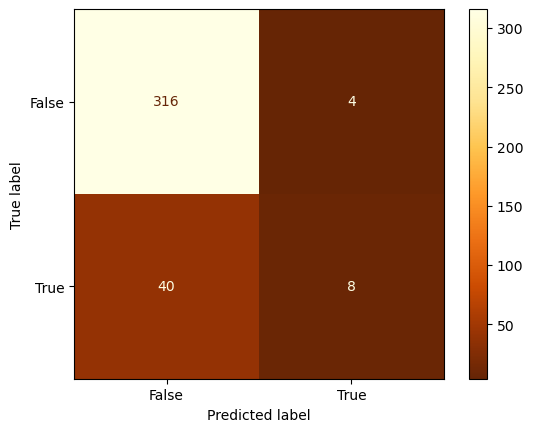

In [1065]:
ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'YlOrBr_r', display_labels = ["False", "True"]);

###### ** The confusion matrix reveals that the true labels of the test data are distributed as follows: The top left quadrant, represented by a light beige, shows a count of 316. This indicates the number of correctly predicted instances where the actual label is classified correctly by the model. The top right quadrant, represented by a dark brown color, shows a count of 4. This represents the number of instances where the model incorrectly predicted a positive label (false positives). The bottom right quadrant, also represented by a dark brown, shows a count of 8. This represents the number of instances where the model correctly predicted negative labels (true negatives). Lastly, the bottom left quadrant, represented by a medium brown, shows a count of 40. This represents the number of instances where the model incorrectly predicted a negative label (false negatives).

###### ** From this information, we can conclude that the model has performed quite well in terms of correctly predicting the true positive and true negative instances. However, it has made some errors by misclassifying a few instances as false positives or false negatives.

In [1066]:
attrition = []

In [1067]:
for k in range (3,32,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sc,y_train)
    acc_train=knn.score(X_train_sc, y_train)
    acc_test=knn.score(X_test_sc,y_test)
    attrition.append({'k':k,'Training Accuracy':acc_train,'Test Accuracy':acc_test})

df_attrition = pd.DataFrame(attrition)
df_attrition

,k,Training Accuracy,Test Accuracy
0,3,0.888385,0.834239
1,5,0.859347,0.880435
2,7,0.846642,0.880435
3,9,0.845735,0.877717
4,11,0.836661,0.872283
5,13,0.836661,0.875000
6,15,0.833031,0.872283
7,17,0.833031,0.872283
8,19,0.831216,0.872283
9,21,0.830309,0.872283


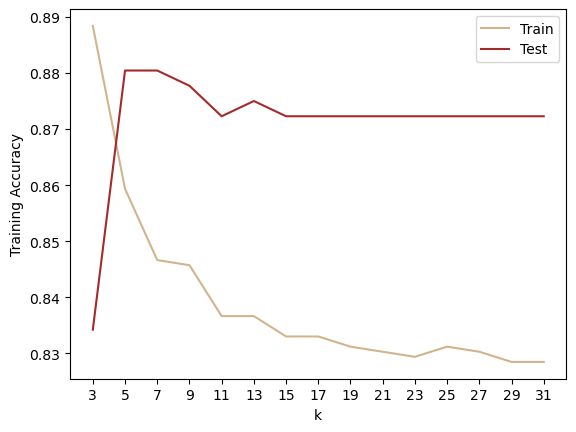

In [1068]:
sns.lineplot(data = df_attrition, x = 'k', y = 'Training Accuracy', c='tan', label='Train')
sns.lineplot(data = df_attrition, x = 'k', y = 'Test Accuracy', c='brown', label='Test')
plt.xticks(range(3, 32, 2));

###### ** 1) Training Accuracy: The tan line representing the training accuracy shows a general decreasing trend as the value of k increases. This suggests that as the number of neighbors considered for classification increases, the model's ability to fit the training data decreases. However, after an initial drop from 0.89 to 0.86 at k=5, the training accuracy stabilizes around 0.83 for odd values of k (starting from k=7). 2) Test Accuracy: The brown line representing the test accuracy shows a different pattern compared to the training accuracy. It starts at 0.83 at k=3, jumps to 0.88 at k=5, and then maintains relatively high accuracy (0.88) for odd values of k (starting from k=7). This indicates that the model generalizes well to unseen test data for these values of k.

###### ** Based on these observations, it can be concluded that while the training accuracy decreases with an increase in k, the test accuracy remains relatively stable and even improves for certain values of k. This suggests that a moderate number of neighbors (around k=7) are crucial for achieving a good balance between model complexity and generalization performance.



In [1069]:
# Logistic Regression 

In [1070]:
from sklearn.linear_model import LogisticRegression

In [1071]:

logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [1072]:
logr = LogisticRegression()
logr.fit(X_train_sc, y_train)

LogisticRegression()

In [1073]:
logr.score(X_train_sc, y_train)

0.8484573502722323

In [1074]:

logr.score(X_test_sc, y_test)

0.8777173913043478

###### ** 85% on the training set, 88% on the test set.

In [1075]:
# Forest Classifier

In [1076]:
from sklearn.ensemble import RandomForestClassifier

In [1077]:

rf = RandomForestClassifier()
rf.fit(X_train_sc, y_train)

RandomForestClassifier()

In [1078]:
rf.score(X_train_sc, y_train)

1.0

In [1079]:
rf.score(X_test_sc, y_test)

0.8586956521739131

###### ** 100% on the training set, 86% on the test set.

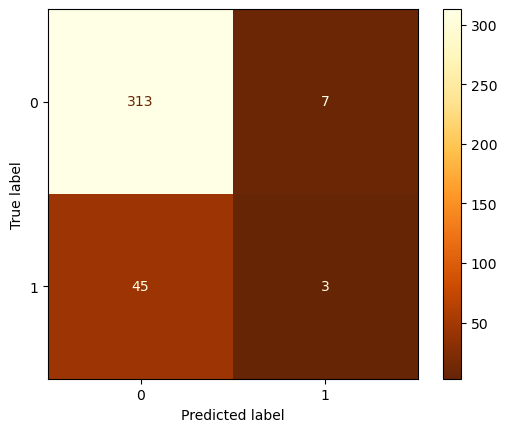

In [1080]:
ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'YlOrBr_r');

###### ** The top left quadrant, represented by a light beige, shows a count of 314. This indicates the number of correctly predicted instances where the actual label is classified correctly by the model. The top right quadrant, represented by a dark brown color, shows a count of 6. This represents the number of instances where the model incorrectly predicted a positive label (false positives). The bottom right quadrant, also represented by a dark brown, shows a count of 4. This represents the number of instances where the model correctly predicted negative labels (true negatives). Lastly, the bottom left quadrant, represented by a medium brown, shows a count of 44. This represents the number of instances where the model incorrectly predicted a negative label (false negatives).

###### ** From this information, we can conclude that the model has performed well in terms of correctly predicting the true positive and true negative instances. However, it has made some errors by misclassifying a few instances as false positives or false negatives.



#### Part V: Overall Conclusion 

##### Although the Random Forest Classifier achieved a perfect accuracy score of 100% on the training data, it did not generalize well to the testing data, achieving an accuracy score of only 86%. On the other hand, the K-Nearest Neighbors (KNN) model showed a relatively consistent performance with an accuracy score of 86% on the training data and slightly improved to 88% on the testing data. Similarly, the Logistic AgRegression model performed consistently with an accuracy score of 85% on the training data and improved to 88% on the testing data.


##### From this information, we can conclude that while the Random Forest Classifier may have overfit the training data by achieving a perfect score, it struggled to generalize to new, unseen data. On the other hand, both the KNN and Logistic Regression models demonstrated better generalization performance, with the KNN model having a slightly higher accuracy score on the testing data. 

##### When using predictive modeling, working with KNN or Logistic Regression will yeild the best results.